In this exercise, I will perform an autoencoder on a dataset regarding people's dietary intake in different countries in the UK

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')

In [4]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [5]:
df = df.transpose()

In [6]:
df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


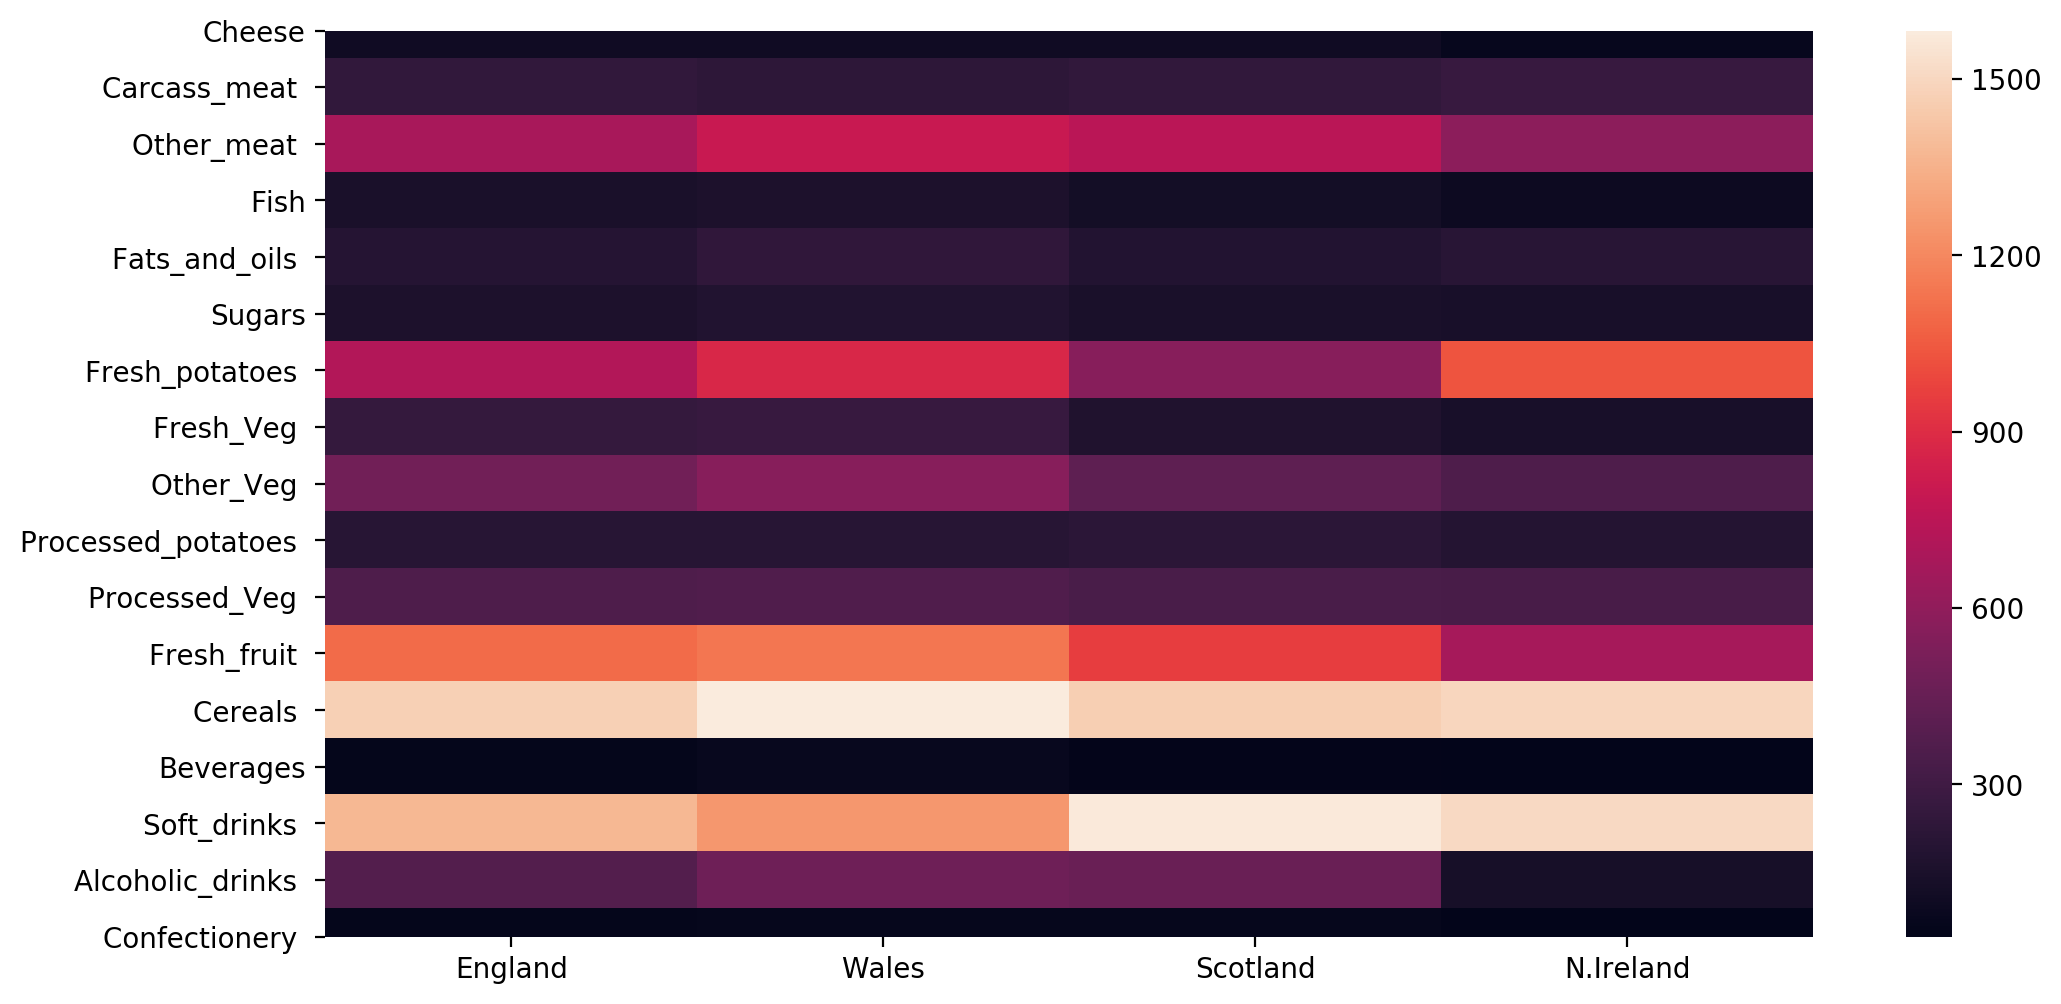

In [8]:
plt.figure(figsize=(12,6), dpi=200)
sns.heatmap(data=df.transpose())

In [10]:
len(df.columns)

17

In [34]:
encoder = Sequential()

encoder.add(Dense(8, activation='relu', input_shape=[17]))
encoder.add(Dense(4, activation='relu', input_shape=[8]))
encoder.add(Dense(2, activation='relu', input_shape=[4]))

In [35]:
decoder = Sequential()

decoder.add(Dense(4, activation='relu', input_shape=[2]))
decoder.add(Dense(8, activation='relu', input_shape=[4]))
decoder.add(Dense(17, activation='relu', input_shape=[8]))

In [36]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer=SGD(lr=1.5))

In [37]:
scaler = MinMaxScaler()

In [38]:
scaled_df = scaler.fit_transform(df)

In [39]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [40]:
autoencoder.fit(scaled_df, scaled_df, epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 0s 54ms/sample - loss: 0.3594
Epoch 2/15
4/4 [==============================] - 0s 499us/sample - loss: 0.3353
Epoch 3/15
4/4 [==============================] - 0s 748us/sample - loss: 0.3768
Epoch 4/15
4/4 [==============================] - 0s 499us/sample - loss: 0.2953
Epoch 5/15
4/4 [==============================] - 0s 502us/sample - loss: 0.2823
Epoch 6/15
4/4 [==============================] - 0s 498us/sample - loss: 0.2914
Epoch 7/15
4/4 [==============================] - 0s 746us/sample - loss: 0.2807
Epoch 8/15
4/4 [==============================] - 0s 499us/sample - loss: 0.3134
Epoch 9/15
4/4 [==============================] - 0s 498us/sample - loss: 0.2651
Epoch 10/15
4/4 [==============================] - 0s 745us/sample - loss: 0.2645
Epoch 11/15
4/4 [==============================] - 0s 498us/sample - loss: 0.2668
Epoch 12/15
4/4 [==============================] - 0s 249us/sample - loss: 0.2935
Epoch 1

In [41]:
encoded = encoder.predict(scaled_df)

In [42]:
encoded

array([[0.        , 0.96966517],
       [0.        , 3.3579073 ],
       [0.        , 0.8137273 ],
       [0.        , 0.08921742]], dtype=float32)

In [43]:
results = pd.DataFrame(data=encoded, index=['England', 'Wales', 'Scotland', 'N.Ireland'], columns=['C1', 'C2'])

In [44]:
results = results.reset_index()

In [45]:
results

,index,C1,C2
0,England,0.0,0.969665
1,Wales,0.0,3.357907
2,Scotland,0.0,0.813727
3,N.Ireland,0.0,0.089217


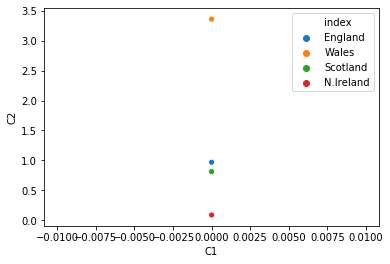

In [46]:
sns.scatterplot(x='C1',y='C2',data=results,hue='index')